In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import math 
import sys

In [2]:
bom_movie_gross_clean = pd.read_csv('bom_movie_gross_clean.csv')
bom_movie_gross_clean

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3351,The Quake,Magn.,6200.0,2018
3352,Edward II (2018 re-release),FM,4800.0,2018
3353,El Pacto,Sony,2500.0,2018
3354,The Swan,Synergetic,2400.0,2018


In [3]:
bom_movie_gross_30m = bom_movie_gross_clean[bom_movie_gross_clean['domestic_gross'] > 20000000]

In [4]:
num_of_movies = bom_movie_gross_30m.groupby('studio').count()
num_of_values = num_of_movies.sort_values('title', ascending = False)

In [5]:
num_of_values = num_of_values[0:15]

In [6]:
num_of_values = num_of_values.reset_index()

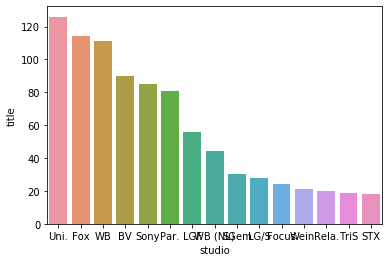

In [7]:
sns.barplot(x= 'studio', y = 'title', data = num_of_values)